#  Linear Regression

## Bike Sharing 

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

#### Business Goal:

Company to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- 1.Which variables are significant in predicting the demand for shared bikes.
- 2.How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data


In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#Reading day.csv file

bike = pd.read_csv("day.csv")

In [5]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the dataframe

In [6]:
bike.shape

(730, 16)

In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There seems no missing values in dataset

In [9]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data cleaning:

Dropping columns which is not necessary for our analysis

In [10]:
bike.drop(['dteday','registered', 'casual', 'instant'],axis=1,inplace=True)

In [11]:
#Inspecting dataframe after dropping columns
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [12]:
bike['season']= bike.season.map({1: "spring", 2 : "summer", 3 : "fall", 4 :"winter" })
bike['weathersit']= bike.weathersit.map({1: "Clear", 2 : "Mist", 3 : "Light Snow", 4 :"Heavy Rain + Ice Pallets" })
bike['weekday']=bike.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
bike['mnth']=bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})


In [13]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
#changing variable for all the above categorical columns
bike= bike.astype({'weekday': 'category', 'mnth': 'category', 'season': 'category', 'weathersit': 'category'})

In [15]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [16]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualizing the data

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

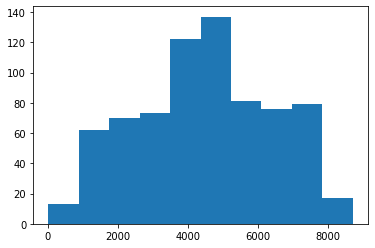

In [18]:
#Plottig distribution of count
plt.hist(bike['cnt'])
plt.show()

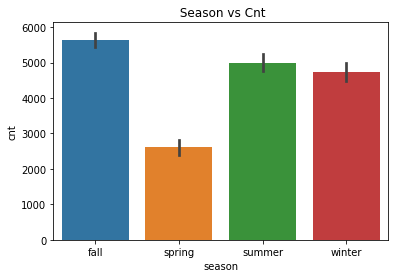

In [19]:
#Plotting  season vs cnt
plt.title(" Season vs Cnt")
sns.barplot('season','cnt',data=bike)
plt.show()

Demand is more during fall season

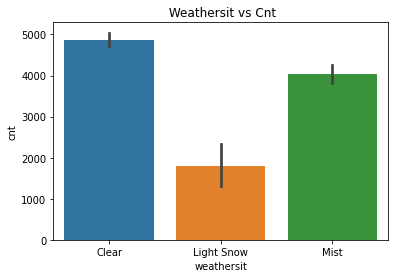

In [20]:
#Weathersit vs Cnt
plt.title(" Weathersit vs Cnt")
sns.barplot('weathersit','cnt',data=bike)
plt.show()

Bike rental is more if there is Clear, Few clouds, Partly cloudy, Partly cloudy SKY

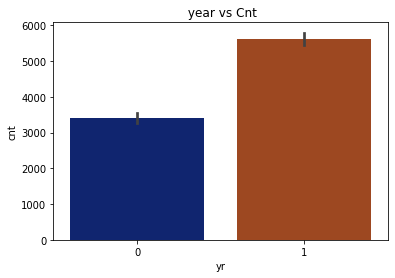

In [21]:
#Year vs Cnt
plt.title(" year vs Cnt")
sns.barplot('yr','cnt',data=bike,palette='dark')
plt.show()

Demand  has increased in 2019 when compared to 2018

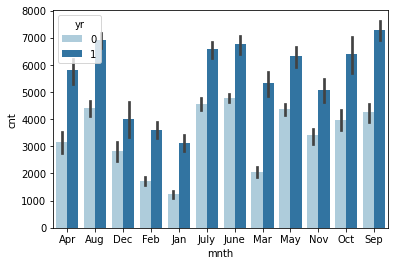

In [22]:
#Month vs Count
sns.barplot('mnth','cnt',hue='yr',data=bike,palette='Paired')
plt.show()

As seen earlier demand was more during fall season and is more in september month.

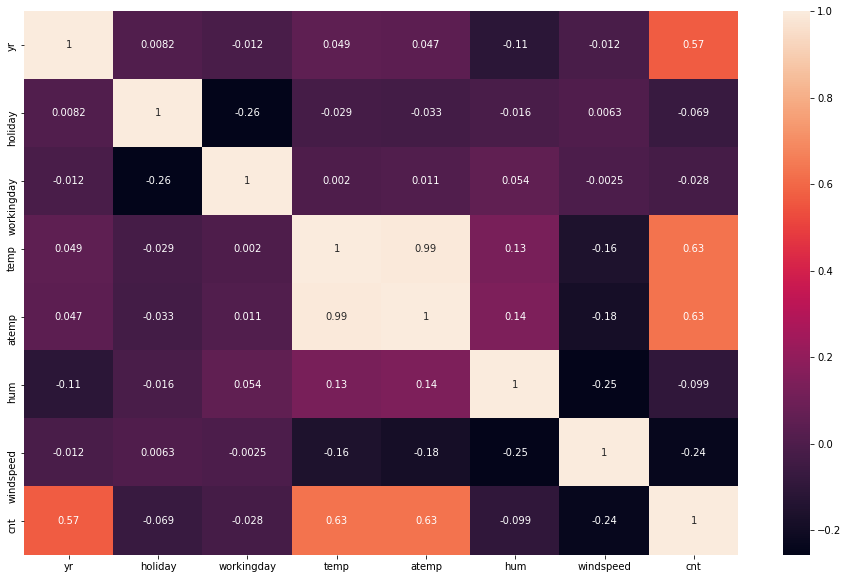

In [23]:
#Plotting correlation matrix
plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True)
plt.show()

In [24]:
#bike

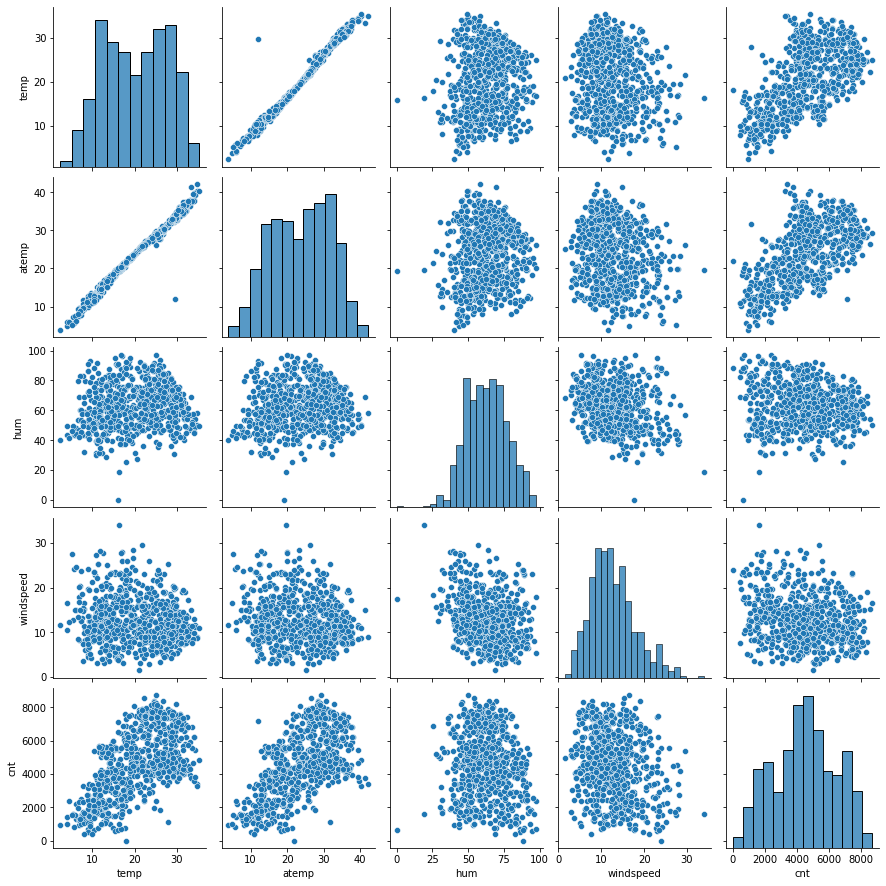

In [25]:
sns.pairplot(bike, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

In [26]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [27]:
#atemp and temp are highly correlated and one can be dropped
bike.drop(['atemp'],axis=1,inplace=True)

In [28]:
#Creating dummy variables for cateogrical columns
seasons = pd.get_dummies(bike['season'],drop_first=True)

weather= pd.get_dummies(bike['weathersit'],drop_first=True)

month= pd.get_dummies(bike['mnth'],drop_first=True)

week_day= pd.get_dummies(bike['weekday'],drop_first=True)

In [29]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


In [30]:
bike= pd.concat([bike,seasons,weather,month,week_day],axis=1)

In [31]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
 11  spring      730 non-null    uint8   
 12  summer      730 non-null    uint8   
 13  winter      730 non-null    uint8   
 14  Light Snow  730 non-null    uint8   
 15  Mist        730 non-null    uint8   
 16  Aug         730 non-null    uint8   
 17  Dec         730 non-null    uint8   
 18  Feb         730 non-null    uint8   
 19  Jan     

In [32]:
bike.drop(['season','weathersit','weekday','mnth'],axis=1,inplace=True)

In [33]:
bike.shape

(730, 29)

In [34]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  Light Snow  730 non-null    uint8  
 11  Mist        730 non-null    uint8  
 12  Aug         730 non-null    uint8  
 13  Dec         730 non-null    uint8  
 14  Feb         730 non-null    uint8  
 15  Jan         730 non-null    uint8  
 16  July        730 non-null    uint8  
 17  June        730 non-null    uint8  
 18  Mar         730 non-null    uint8  
 19  May         730 non-null    u

## Step 3: Splitting the Data into Training and Testing Sets

In [35]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [36]:
#Rescaling the Features

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [37]:

#SCALING THE NUMERICAL DATA
num_vars=['temp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [38]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [39]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Light Snow,Mist,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [42]:
#CREATING X AND Y

y_train = df_train.pop('cnt')
X_train = df_train

In [43]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Light Snow,Mist,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [44]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Step 4: Building a linear model

In [45]:
#USING RFE APPROACH FOR FEATURE SELECTION

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
#Creating an object of liner regression

lm=LinearRegression()

#fit model
lm.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
#print(lm.coef_)
#print(lm.intercept_)

In [48]:
#USING RFE APPROACH FOR FEATURE SELECTION
# WE START WITH 15 VARS AND WILL USE MIXED APPROACH TO BUILD A MODEL

rfe = RFE(lm,15) 
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 12),
 ('Tuesday', False, 7),
 ('Wednesday', False, 10)]

In [50]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Status,Ranking
0,yr,True,1
1,holiday,True,1
21,Sep,True,1
3,temp,True,1
4,hum,True,1
5,windspeed,True,1
6,spring,True,1
7,summer,True,1
8,winter,True,1
9,Light Snow,True,1


In [51]:
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Light Snow', 'Mist', 'Dec', 'Jan', 'July', 'Nov', 'Sep'],
      dtype='object')

In [52]:
X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [53]:
X_train_rfe = X_train[cols]

In [54]:
#BUILDING MODEL USING STATSMODEL
# Adding a constant variable 

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [55]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe1).fit() 

In [56]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 17 May 2021   Prob (F-statistic):          3.34e-189
Time:                        17:19:20   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.0

In the above model , according to the pvalues , all the variables are significant.

In [57]:
X_train_rfe1 = X_train_rfe1.drop(['const'], axis=1)

In [58]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
9,Mist,2.32
0,yr,2.09
13,Nov,1.83
11,Jan,1.75


In [59]:
#We see that the VIF value for the variable 'hum' is very high so we are going to drop humidity variable.

X = X_train_rfe1.drop('hum', 1,)

In [60]:
#linear model2

In [61]:
X_train_rfe2 = sm.add_constant(X)

lm_2 = sm.OLS(y_train, X_train_rfe2).fit()

In [62]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 17 May 2021   Prob (F-statistic):          1.57e-186
Time:                        17:19:53   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2466      0.032      7.679      0.0

In [63]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
12,Nov,1.80
10,Jan,1.66
11,July,1.59
8,Mist,1.56


In [64]:
#We see that the VIF value for the variable 'temp' is very high so we are going to drop temp variable.
X = X.drop('temp', 1,)

In [65]:
#linear model 3

In [66]:
X_train_rfe3 = sm.add_constant(X)

lm_3 = sm.OLS(y_train, X_train_rfe3).fit()

In [67]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Mon, 17 May 2021   Prob (F-statistic):          5.50e-160
Time:                        17:20:12   Log-Likelihood:                 439.69
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5961      0.016     37.557      0.0

In [68]:
#We see that the p value for July is very high so we are going to drop temp variable.
X = X.drop('July', 1,)

In [69]:
#Linear regression model 4
X_train_rfe4 = sm.add_constant(X)

lm_4 = sm.OLS(y_train, X_train_rfe4).fit()

In [70]:
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     158.0
Date:                Mon, 17 May 2021   Prob (F-statistic):          6.36e-161
Time:                        17:20:35   Log-Likelihood:                 439.28
No. Observations:                 510   AIC:                            -852.6
Df Residuals:                     497   BIC:                            -797.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5892      0.014     42.571      0.0

In [71]:
#We see p value of winter is high hence dropping same
X = X.drop('winter', 1,)

In [72]:
X_train_rfe5 = sm.add_constant(X)

lm_5 = sm.OLS(y_train, X_train_rfe5).fit()

print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 17 May 2021   Prob (F-statistic):          7.42e-162
Time:                        17:20:45   Log-Likelihood:                 438.82
No. Observations:                 510   AIC:                            -853.6
Df Residuals:                     498   BIC:                            -802.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5845      0.013     45.172      0.0

In [73]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.22
3,spring,2.36
0,yr,1.74
4,summer,1.69
8,Jan,1.62
6,Mist,1.47
9,Nov,1.23
10,Sep,1.16
7,Dec,1.13
1,holiday,1.06


In [74]:
#ADDING Temp
X['temp']=X_train['temp']
X.head()

,yr,holiday,windspeed,spring,summer,Light Snow,Mist,Dec,Jan,Nov,Sep,temp
653,1,0,0.300794,0,0,0,0,0,0,0,0,0.509887
576,1,0,0.264686,0,0,0,0,0,0,0,0,0.815169
426,1,0,0.255342,1,0,0,1,0,0,0,0,0.442393
728,1,0,0.663106,1,0,0,0,1,0,0,0,0.245101
482,1,0,0.188475,0,1,0,1,0,0,0,0,0.395666


In [75]:
X_train_rfe6 = sm.add_constant(X)

lm_6 = sm.OLS(y_train, X_train_rfe6).fit()

print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     197.4
Date:                Mon, 17 May 2021   Prob (F-statistic):          2.64e-180
Time:                        17:21:09   Log-Likelihood:                 485.30
No. Observations:                 510   AIC:                            -944.6
Df Residuals:                     497   BIC:                            -889.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3572      0.026     13.906      0.0

In [76]:
#We see p value of summer is high hence dropping same
X = X.drop('summer', 1,)

In [77]:
X_train_rfe7 = sm.add_constant(X)

lm_7 = sm.OLS(y_train, X_train_rfe7).fit()

print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.8
Date:                Mon, 17 May 2021   Prob (F-statistic):          1.76e-181
Time:                        17:21:24   Log-Likelihood:                 485.29
No. Observations:                 510   AIC:                            -946.6
Df Residuals:                     498   BIC:                            -895.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3564      0.023     15.285      0.0

In [78]:
#We see p value of Nov is high hence dropping same

X = X.drop('Nov', 1,)

In [79]:
X_train_rfe8 = sm.add_constant(X)

lm_8 = sm.OLS(y_train, X_train_rfe8).fit()

print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 17 May 2021   Prob (F-statistic):          1.44e-182
Time:                        17:21:34   Log-Likelihood:                 485.02
No. Observations:                 510   AIC:                            -948.0
Df Residuals:                     499   BIC:                            -901.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3486      0.021     16.877      0.0

In [80]:
#We see p value of Dec is high hence dropping same

X = X.drop('Dec', 1,)

In [81]:
X_train_rfe9 = sm.add_constant(X)

lm_9 = sm.OLS(y_train, X_train_rfe9).fit()

print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.9
Date:                Mon, 17 May 2021   Prob (F-statistic):          3.00e-183
Time:                        17:21:48   Log-Likelihood:                 483.75
No. Observations:                 510   AIC:                            -947.5
Df Residuals:                     500   BIC:                            -905.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3357      0.019     17.659      0.0

In [82]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,3.76
2,windspeed,3.73
3,spring,2.11
0,yr,2.03
6,Jan,1.60
5,Mist,1.47
7,Sep,1.16
4,Light Snow,1.06
1,holiday,1.03


In [83]:
#ADDING Feb
X['Feb']=X_train['Feb']
X.head()

,yr,holiday,windspeed,spring,Light Snow,Mist,Jan,Sep,temp,Feb
653,1,0,0.300794,0,0,0,0,0,0.509887,0
576,1,0,0.264686,0,0,0,0,0,0.815169,0
426,1,0,0.255342,1,0,1,0,0,0.442393,0
728,1,0,0.663106,1,0,0,0,0,0.245101,0
482,1,0,0.188475,0,0,1,0,0,0.395666,0


In [84]:
X_train_rfe10 = sm.add_constant(X)

lm_10 = sm.OLS(y_train, X_train_rfe10).fit()

print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.4
Date:                Mon, 17 May 2021   Prob (F-statistic):          1.59e-182
Time:                        17:22:06   Log-Likelihood:                 484.93
No. Observations:                 510   AIC:                            -947.9
Df Residuals:                     499   BIC:                            -901.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3381      0.019     17.747      0.0

In [85]:
#We see p value of Feb is high hence dropping same
X = X.drop('Feb', 1,)

In [86]:
X_train_rfe11 = sm.add_constant(X)

lm_11 = sm.OLS(y_train, X_train_rfe11).fit()

print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.9
Date:                Mon, 17 May 2021   Prob (F-statistic):          3.00e-183
Time:                        17:22:18   Log-Likelihood:                 483.75
No. Observations:                 510   AIC:                            -947.5
Df Residuals:                     500   BIC:                            -905.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3357      0.019     17.659      0.0

In [87]:
#ADDING workingday
X['workingday']=X_train['workingday']
X.head()

,yr,holiday,windspeed,spring,Light Snow,Mist,Jan,Sep,temp,workingday
653,1,0,0.300794,0,0,0,0,0,0.509887,1
576,1,0,0.264686,0,0,0,0,0,0.815169,1
426,1,0,0.255342,1,0,1,0,0,0.442393,0
728,1,0,0.663106,1,0,0,0,0,0.245101,1
482,1,0,0.188475,0,0,1,0,0,0.395666,0


In [88]:
X_train_rfe12 = sm.add_constant(X)

lm_12 = sm.OLS(y_train, X_train_rfe12).fit()

print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.6
Date:                Mon, 17 May 2021   Prob (F-statistic):          5.80e-183
Time:                        17:22:32   Log-Likelihood:                 485.96
No. Observations:                 510   AIC:                            -949.9
Df Residuals:                     499   BIC:                            -903.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3528      0.021     17.093      0.0

In [89]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,4.65
2,windspeed,3.92
9,workingday,3.16
3,spring,2.15
0,yr,2.03
6,Jan,1.61
5,Mist,1.47
7,Sep,1.16
1,holiday,1.08
4,Light Snow,1.06


In [90]:
#Model had improved 

In [91]:
#ADDING Saturday
X['Saturday']=X_train['Saturday']
X.head()

,yr,holiday,windspeed,spring,Light Snow,Mist,Jan,Sep,temp,workingday,Saturday
653,1,0,0.300794,0,0,0,0,0,0.509887,1,0
576,1,0,0.264686,0,0,0,0,0,0.815169,1,0
426,1,0,0.255342,1,0,1,0,0,0.442393,0,0
728,1,0,0.663106,1,0,0,0,0,0.245101,1,0
482,1,0,0.188475,0,0,1,0,0,0.395666,0,0


In [92]:
X_train_rfe13 = sm.add_constant(X)

lm_13 = sm.OLS(y_train, X_train_rfe13).fit()

print(lm_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.5
Date:                Mon, 17 May 2021   Prob (F-statistic):          8.97e-182
Time:                        17:22:55   Log-Likelihood:                 485.99
No. Observations:                 510   AIC:                            -948.0
Df Residuals:                     498   BIC:                            -897.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3546      0.022     15.972      0.0

In [93]:
#p value for Saturday is very high , hence dropping 
X = X.drop('Saturday', 1,)

In [94]:
X_train_rfe14 = sm.add_constant(X)

lm_14 = sm.OLS(y_train, X_train_rfe14).fit()

print(lm_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.6
Date:                Mon, 17 May 2021   Prob (F-statistic):          5.80e-183
Time:                        17:23:06   Log-Likelihood:                 485.96
No. Observations:                 510   AIC:                            -949.9
Df Residuals:                     499   BIC:                            -903.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3528      0.021     17.093      0.0

In [95]:
#ADDING Sunday
X['Sunday']=X_train['Sunday']
X.head()

,yr,holiday,windspeed,spring,Light Snow,Mist,Jan,Sep,temp,workingday,Sunday
653,1,0,0.300794,0,0,0,0,0,0.509887,1,0
576,1,0,0.264686,0,0,0,0,0,0.815169,1,0
426,1,0,0.255342,1,0,1,0,0,0.442393,0,1
728,1,0,0.663106,1,0,0,0,0,0.245101,1,0
482,1,0,0.188475,0,0,1,0,0,0.395666,0,1


In [96]:
X_train_rfe15 = sm.add_constant(X)

lm_15 = sm.OLS(y_train, X_train_rfe15).fit()

print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.5
Date:                Mon, 17 May 2021   Prob (F-statistic):          9.09e-182
Time:                        17:23:17   Log-Likelihood:                 485.97
No. Observations:                 510   AIC:                            -947.9
Df Residuals:                     498   BIC:                            -897.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3516      0.022     15.785      0.0

In [97]:
#p value for Sunday is very high , hence dropping 
X = X.drop('Sunday', 1,)

In [98]:
X_train_rfe16 = sm.add_constant(X)

lm_16 = sm.OLS(y_train, X_train_rfe16).fit()

print(lm_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.6
Date:                Mon, 17 May 2021   Prob (F-statistic):          5.80e-183
Time:                        17:23:28   Log-Likelihood:                 485.96
No. Observations:                 510   AIC:                            -949.9
Df Residuals:                     499   BIC:                            -903.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3528      0.021     17.093      0.0

In [99]:
#ADDING May
X['May']=X_train['May']
X.head()

,yr,holiday,windspeed,spring,Light Snow,Mist,Jan,Sep,temp,workingday,May
653,1,0,0.300794,0,0,0,0,0,0.509887,1,0
576,1,0,0.264686,0,0,0,0,0,0.815169,1,0
426,1,0,0.255342,1,0,1,0,0,0.442393,0,0
728,1,0,0.663106,1,0,0,0,0,0.245101,1,0
482,1,0,0.188475,0,0,1,0,0,0.395666,0,0


In [100]:
X_train_rfe17 = sm.add_constant(X)

lm_17 = sm.OLS(y_train, X_train_rfe17).fit()

print(lm_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.6
Date:                Mon, 17 May 2021   Prob (F-statistic):          3.08e-182
Time:                        17:23:42   Log-Likelihood:                 487.08
No. Observations:                 510   AIC:                            -950.2
Df Residuals:                     498   BIC:                            -899.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3522      0.021     17.079      0.0

In [101]:
#p value for May is very high , hence dropping 
X = X.drop('May', 1,)

In [102]:
X_train_rfe18 = sm.add_constant(X)

lm_18 = sm.OLS(y_train, X_train_rfe18).fit()

print(lm_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.6
Date:                Mon, 17 May 2021   Prob (F-statistic):          5.80e-183
Time:                        17:23:52   Log-Likelihood:                 485.96
No. Observations:                 510   AIC:                            -949.9
Df Residuals:                     499   BIC:                            -903.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3528      0.021     17.093      0.0

In [103]:
#ADDING Tuesday
X['Tuesday']=X_train['Tuesday']
X.head()

,yr,holiday,windspeed,spring,Light Snow,Mist,Jan,Sep,temp,workingday,Tuesday
653,1,0,0.300794,0,0,0,0,0,0.509887,1,0
576,1,0,0.264686,0,0,0,0,0,0.815169,1,0
426,1,0,0.255342,1,0,1,0,0,0.442393,0,0
728,1,0,0.663106,1,0,0,0,0,0.245101,1,0
482,1,0,0.188475,0,0,1,0,0,0.395666,0,0


In [ ]:
X_train_rfe19 = sm.add_constant(X)

lm_19 = sm.OLS(y_train, X_train_rfe19).fit()

print(lm_19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.0
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.28e-182
Time:                        12:41:44   Log-Likelihood:                 487.39
No. Observations:                 510   AIC:                            -950.8
Df Residuals:                     498   BIC:                            -900.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3521      0.021     17.090      0.0

In [104]:
#p value for workingday is very high , hence dropping 
X = X.drop('workingday', 1,)

In [105]:
X_train_rfe20 = sm.add_constant(X)

lm_20 = sm.OLS(y_train, X_train_rfe20).fit()

print(lm_20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Mon, 17 May 2021   Prob (F-statistic):          5.13e-183
Time:                        17:24:12   Log-Likelihood:                 486.09
No. Observations:                 510   AIC:                            -950.2
Df Residuals:                     499   BIC:                            -903.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3393      0.019     17.843      0.0

In [106]:
#ADDING Monday
X['Monday']=X_train['Monday']
X.head()

,yr,holiday,windspeed,spring,Light Snow,Mist,Jan,Sep,temp,Tuesday,Monday
653,1,0,0.300794,0,0,0,0,0,0.509887,0,0
576,1,0,0.264686,0,0,0,0,0,0.815169,0,0
426,1,0,0.255342,1,0,1,0,0,0.442393,0,0
728,1,0,0.663106,1,0,0,0,0,0.245101,0,1
482,1,0,0.188475,0,0,1,0,0,0.395666,0,0


In [107]:
X_train_rfe21 = sm.add_constant(X)

lm_21 = sm.OLS(y_train, X_train_rfe21).fit()

print(lm_21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.6
Date:                Mon, 17 May 2021   Prob (F-statistic):          4.90e-183
Time:                        17:24:27   Log-Likelihood:                 488.97
No. Observations:                 510   AIC:                            -953.9
Df Residuals:                     498   BIC:                            -903.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3458      0.019     18.083      0.0

In [108]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,3.87
2,windspeed,3.82
3,spring,2.11
0,yr,2.03
6,Jan,1.60
5,Mist,1.47
9,Tuesday,1.21
10,Monday,1.21
7,Sep,1.16
4,Light Snow,1.06


In [109]:
#ADDING Aug
X['Aug']=X_train['Aug']
X.head()

,yr,holiday,windspeed,spring,Light Snow,Mist,Jan,Sep,temp,Tuesday,Monday,Aug
653,1,0,0.300794,0,0,0,0,0,0.509887,0,0,0
576,1,0,0.264686,0,0,0,0,0,0.815169,0,0,0
426,1,0,0.255342,1,0,1,0,0,0.442393,0,0,0
728,1,0,0.663106,1,0,0,0,0,0.245101,0,1,0
482,1,0,0.188475,0,0,1,0,0,0.395666,0,0,0


In [110]:
X_train_rfe22 = sm.add_constant(X)

lm_22 = sm.OLS(y_train, X_train_rfe22).fit()

print(lm_22.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Mon, 17 May 2021   Prob (F-statistic):          7.10e-182
Time:                        17:24:54   Log-Likelihood:                 489.02
No. Observations:                 510   AIC:                            -952.0
Df Residuals:                     497   BIC:                            -897.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3447      0.019     17.734      0.0

In [111]:
#p value for Aug is high ,dropping it
X = X.drop('Aug', 1,)

In [112]:
X_train_rfe23 = sm.add_constant(X)

lm_23 = sm.OLS(y_train, X_train_rfe23).fit()

print(lm_23.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.6
Date:                Mon, 17 May 2021   Prob (F-statistic):          4.90e-183
Time:                        17:25:04   Log-Likelihood:                 488.97
No. Observations:                 510   AIC:                            -953.9
Df Residuals:                     498   BIC:                            -903.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3458      0.019     18.083      0.0

In [113]:
#ADDING Wednesday
X['Wednesday']=X_train['Wednesday']
X.head()

,yr,holiday,windspeed,spring,Light Snow,Mist,Jan,Sep,temp,Tuesday,Monday,Wednesday
653,1,0,0.300794,0,0,0,0,0,0.509887,0,0,1
576,1,0,0.264686,0,0,0,0,0,0.815169,0,0,1
426,1,0,0.255342,1,0,1,0,0,0.442393,0,0,0
728,1,0,0.663106,1,0,0,0,0,0.245101,0,1,0
482,1,0,0.188475,0,0,1,0,0,0.395666,0,0,0


In [114]:
X_train_rfe24 = sm.add_constant(X)

lm_24 = sm.OLS(y_train, X_train_rfe24).fit()

print(lm_24.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.3
Date:                Mon, 17 May 2021   Prob (F-statistic):          5.11e-182
Time:                        17:25:17   Log-Likelihood:                 489.36
No. Observations:                 510   AIC:                            -952.7
Df Residuals:                     497   BIC:                            -897.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3489      0.019     17.920      0.0

In [115]:
#pvalue is high,
X = X.drop('Wednesday', 1,)

In [116]:
#ADDING Oct
X['Oct']=X_train['Oct']
X.head()

,yr,holiday,windspeed,spring,Light Snow,Mist,Jan,Sep,temp,Tuesday,Monday,Oct
653,1,0,0.300794,0,0,0,0,0,0.509887,0,0,1
576,1,0,0.264686,0,0,0,0,0,0.815169,0,0,0
426,1,0,0.255342,1,0,1,0,0,0.442393,0,0,0
728,1,0,0.663106,1,0,0,0,0,0.245101,0,1,0
482,1,0,0.188475,0,0,1,0,0,0.395666,0,0,0


In [117]:
X_train_rfe25 = sm.add_constant(X)

lm_25 = sm.OLS(y_train, X_train_rfe25).fit()

print(lm_25.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.2
Date:                Mon, 17 May 2021   Prob (F-statistic):          1.70e-185
Time:                        17:25:33   Log-Likelihood:                 497.61
No. Observations:                 510   AIC:                            -969.2
Df Residuals:                     497   BIC:                            -914.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3301      0.019     17.199      0.0

In [118]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,3.88
2,windspeed,3.84
3,spring,2.15
0,yr,2.03
6,Jan,1.60
5,Mist,1.48
9,Tuesday,1.22
10,Monday,1.22
7,Sep,1.17
11,Oct,1.15


In [119]:
#ADDING Thursday
X['Thursday']=X_train['Thursday']
X.head()

,yr,holiday,windspeed,spring,Light Snow,Mist,Jan,Sep,temp,Tuesday,Monday,Oct,Thursday
653,1,0,0.300794,0,0,0,0,0,0.509887,0,0,1,0
576,1,0,0.264686,0,0,0,0,0,0.815169,0,0,0,0
426,1,0,0.255342,1,0,1,0,0,0.442393,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0.245101,0,1,0,0
482,1,0,0.188475,0,0,1,0,0,0.395666,0,0,0,0


In [120]:
X_train_rfe26 = sm.add_constant(X)

lm_26 = sm.OLS(y_train, X_train_rfe26).fit()

print(lm_26.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.8
Date:                Mon, 17 May 2021   Prob (F-statistic):          2.44e-184
Time:                        17:25:52   Log-Likelihood:                 497.64
No. Observations:                 510   AIC:                            -967.3
Df Residuals:                     496   BIC:                            -908.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3295      0.019     17.001      0.0

In [121]:
#p value for Thursday is very high

X = X.drop('Thursday', 1,)

In [122]:
#ADDING June
X['June']=X_train['June']
X.head()

,yr,holiday,windspeed,spring,Light Snow,Mist,Jan,Sep,temp,Tuesday,Monday,Oct,June
653,1,0,0.300794,0,0,0,0,0,0.509887,0,0,1,0
576,1,0,0.264686,0,0,0,0,0,0.815169,0,0,0,0
426,1,0,0.255342,1,0,1,0,0,0.442393,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0.245101,0,1,0,0
482,1,0,0.188475,0,0,1,0,0,0.395666,0,0,0,0


In [123]:
X_train_rfe27 = sm.add_constant(X)

lm_27 = sm.OLS(y_train, X_train_rfe27).fit()

print(lm_27.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.1
Date:                Mon, 17 May 2021   Prob (F-statistic):          1.65e-184
Time:                        17:26:07   Log-Likelihood:                 498.05
No. Observations:                 510   AIC:                            -968.1
Df Residuals:                     496   BIC:                            -908.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3318      0.019     17.208      0.0

In [124]:
#p value for June is very high

X = X.drop('June', 1,)

In [125]:
#ADDING Mar
X['Mar']=X_train['Mar']
X.head()

,yr,holiday,windspeed,spring,Light Snow,Mist,Jan,Sep,temp,Tuesday,Monday,Oct,Mar
653,1,0,0.300794,0,0,0,0,0,0.509887,0,0,1,0
576,1,0,0.264686,0,0,0,0,0,0.815169,0,0,0,0
426,1,0,0.255342,1,0,1,0,0,0.442393,0,0,0,1
728,1,0,0.663106,1,0,0,0,0,0.245101,0,1,0,0
482,1,0,0.188475,0,0,1,0,0,0.395666,0,0,0,0


In [126]:
X_train_rfe28 = sm.add_constant(X)

lm_28 = sm.OLS(y_train, X_train_rfe28).fit()

print(lm_28.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.8
Date:                Mon, 17 May 2021   Prob (F-statistic):          8.23e-185
Time:                        17:26:23   Log-Likelihood:                 498.76
No. Observations:                 510   AIC:                            -969.5
Df Residuals:                     496   BIC:                            -910.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3281      0.019     17.066      0.0

In [127]:
#p value for June is very high

X = X.drop('Mar', 1,)

In [128]:
X_train_rfe29 = sm.add_constant(X)

lm_29 = sm.OLS(y_train, X_train_rfe29).fit()

print(lm_29.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.2
Date:                Mon, 17 May 2021   Prob (F-statistic):          1.70e-185
Time:                        17:26:35   Log-Likelihood:                 497.61
No. Observations:                 510   AIC:                            -969.2
Df Residuals:                     497   BIC:                            -914.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3301      0.019     17.199      0.0

In [129]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,3.88
2,windspeed,3.84
3,spring,2.15
0,yr,2.03
6,Jan,1.60
5,Mist,1.48
9,Tuesday,1.22
10,Monday,1.22
7,Sep,1.17
11,Oct,1.15


In [130]:
#p value for Monday is very high

X = X.drop('Monday', 1,)

In [131]:
X_train_rfe30 = sm.add_constant(X)

lm_30 = sm.OLS(y_train, X_train_rfe30).fit()

print(lm_30.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.3
Date:                Mon, 17 May 2021   Prob (F-statistic):          2.51e-185
Time:                        17:26:55   Log-Likelihood:                 494.40
No. Observations:                 510   AIC:                            -964.8
Df Residuals:                     498   BIC:                            -914.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3237      0.019     16.926      0.0

In [132]:
#p value for Tuesday is very high

X = X.drop('Tuesday', 1,)

In [133]:
X_train_rfe31 = sm.add_constant(X)

lm_31 = sm.OLS(y_train, X_train_rfe31).fit()

print(lm_31.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.2
Date:                Mon, 17 May 2021   Prob (F-statistic):          2.10e-185
Time:                        17:27:08   Log-Likelihood:                 491.72
No. Observations:                 510   AIC:                            -961.4
Df Residuals:                     499   BIC:                            -914.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3201      0.019     16.724      0.0

In [134]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,3.78
2,windspeed,3.76
3,spring,2.14
0,yr,2.03
6,Jan,1.60
5,Mist,1.48
7,Sep,1.17
9,Oct,1.15
4,Light Snow,1.09
1,holiday,1.03


We have considered all columns and checked.

Out all the models model lm31 seems to give good result so we choose it

### Checking Linear Regression Assumptions and Residual Analysis of the train data

In [135]:
#Predict values
y_train_cnt = lm_31.predict(X_train_rfe31)

In [136]:
#CALCULATING RESIDUALS
res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

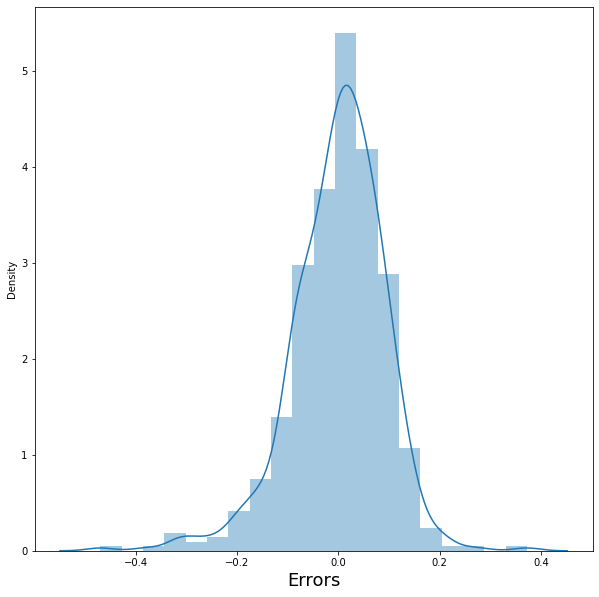

In [137]:
#Checking ASSUMPTION OF NORMALITY:
fig = plt.figure(figsize=(10,10))
sns.distplot((res), bins = 20)
plt.xlabel('Errors', fontsize = 18) 

From the above graph it is evident that Error Distribution Is Normallly Distributed Across 0

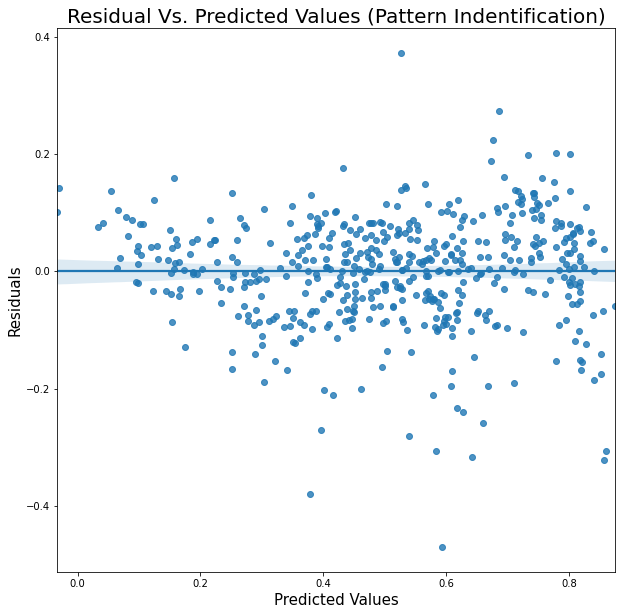

In [138]:
#Checking Assumption of Error Terms Being Independent

plt.figure(figsize=(10,10))
sns.regplot(x=y_train_cnt, y=res)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

From the above graph, we see that there is almost no relation between Residual & Predicted Value.

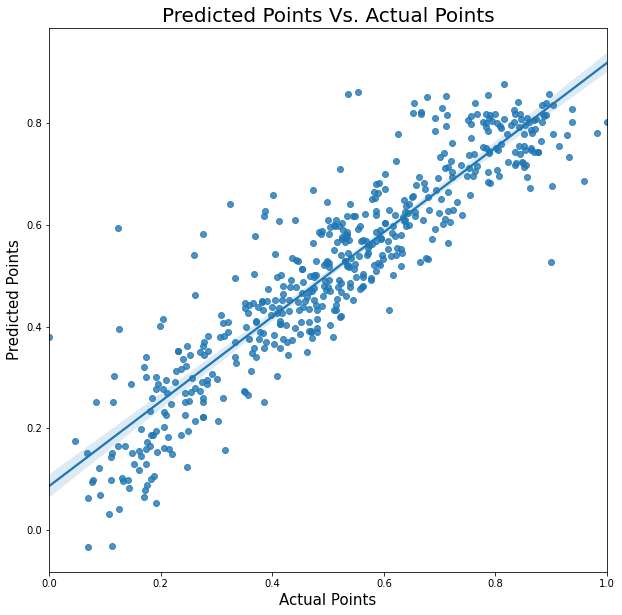

In [139]:
#Homoscedasticity
plt.figure(figsize=(10,10))
sns.regplot(x=y_train, y=y_train_cnt)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

From the above graph, we can say that residuals are equal distributed across predicted value.

#### Predicting on Test Data

In [140]:
#Checking columns
X_train_rfe31.columns

Index(['const', 'yr', 'holiday', 'windspeed', 'spring', 'Light Snow', 'Mist',
       'Jan', 'Sep', 'temp', 'Oct'],
      dtype='object')

In [141]:
print(X_train_rfe31.shape)
print(res.shape)

(510, 11)
(510,)


In [142]:
#Scaling the test data

num_vars=['temp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [143]:
y_test = df_test.pop('cnt')
X_test = df_test

In [144]:
X_train_new=X_train_rfe31.drop(['const'], axis=1)

In [145]:
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [146]:
y_pred = lm_31.predict(X_test_new)
y_pred

184    0.413590
535    0.834489
299    0.403747
221    0.556004
152    0.496404
404    0.443565
198    0.540797
171    0.449094
512    0.678707
200    0.590618
509    0.777282
559    0.707473
109    0.461413
467    0.663150
339    0.107281
589    0.797599
222    0.547475
40     0.140218
682    0.575945
453    0.557687
606    0.814285
265    0.529382
510    0.760093
19     0.069264
117    0.361516
423    0.486744
614    0.852417
163    0.454811
630    0.752792
191    0.521958
572    0.818765
662    0.706375
264    0.518633
625    0.663895
325    0.130949
114    0.488897
218    0.544504
678    0.677067
24     0.077743
432    0.344374
395    0.418596
48     0.295421
684    0.612603
203    0.620659
450    0.596392
538    0.785499
73     0.154631
269    0.526332
710    0.514890
98     0.309690
530    0.744539
173    0.444207
418    0.531040
503    0.762964
727    0.386303
550    0.823590
714    0.568885
448    0.556071
248    0.175678
685    0.600075
410    0.486432
201    0.490296
41     0

Text(0, 0.5, 'y_pred')

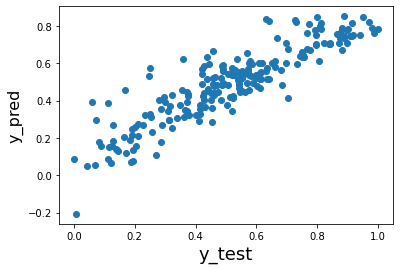

In [147]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)

We have a model that seems good enough to predict demand of bikes. 

In [148]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [149]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.1073021248791999

In [150]:
#Calculating R-square value
r_squared = r2_score(y_test, y_pred)
r_squared

0.7970013728304036

In [151]:
# Calculating Adjusted R2 value 

n= X_test_new.shape[0]


p = X_test_new.shape[1]-1

# we find the Adjusted R-squared value using above formula

adjusted_r2 = 1-((1-r_squared) *(n-1)/(n-p-1))
adjusted_r2

0.7872418234472499

In [152]:
X_t=X_train_new.iloc[:,0].values

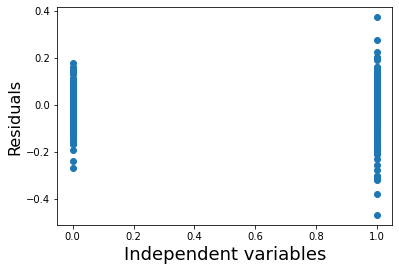

In [153]:
plt.figure()
plt.scatter(X_t,res)
plt.xlabel('Independent variables', fontsize=18)                          
plt.ylabel('Residuals', fontsize=16)  
plt.show()

In [154]:
X_train_new.head()

,yr,holiday,windspeed,spring,Light Snow,Mist,Jan,Sep,temp,Oct
653,1,0,0.300794,0,0,0,0,0,0.509887,1
576,1,0,0.264686,0,0,0,0,0,0.815169,0
426,1,0,0.255342,1,0,1,0,0,0.442393,0
728,1,0,0.663106,1,0,0,0,0,0.245101,0
482,1,0,0.188475,0,0,1,0,0,0.395666,0


In [155]:
print(X_train_rfe31.columns)
print(lm_31.summary())

Index(['const', 'yr', 'holiday', 'windspeed', 'spring', 'Light Snow', 'Mist',
       'Jan', 'Sep', 'temp', 'Oct'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.2
Date:                Mon, 17 May 2021   Prob (F-statistic):          2.10e-185
Time:                        17:29:42   Log-Likelihood:                 491.72
No. Observations:                 510   AIC:                            -961.4
Df Residuals:                     499   BIC:                            -914.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0

#### Conclusion
- Train R-squared: 0.831 , Adj. R-squared: 0.828
- Test R-squared : 0.797,  Adj. R-squared: 0.787

# Equation of the best fit line is:

We can see that the equation for best fitted line is:

cnt= 0.2374*yr-0.0915*holiday-0.1549*windspeed-0.1235spring-0.2974*LightSnow-0.0792*Mist-0.0554*Jan+0.0767*Sep+0.3432*temp+0.0613*Oct

Demand for bikes depends mainly on below variables:
  
 - Yr,holiday,windspeed,spring,Lightsnow,Mist,Jan,Sep,temp,Oct
  
 - Demand increased in month of Sep,Oct and with year,temp
  
 - Demand decreased with holiday,spring,mist,windspeed,lightsnow,mist,Jan month.
  
  Final recommendations for the company:
  
  Company should increase supply during month  of Sep, Oct and when temp, weather is favorable enough
  
  
  



